In [ ]:
import pandas as pd
import numpy as np
import logging
import matplotlib.pyplot as plt
import matplotlib.animation as ani
import matplotlib.colors as mcolors
from matplotlib import dates, rcParams, cycler
from matplotlib.ticker import FuncFormatter, ScalarFormatter
from data_processing import ProcessData

# shh...
logging.getLogger().setLevel('INFO')

# dark theme
plt.style.use('dark_background')

# Set the default styles
color = ['#e84118', 'orange', 'purple', 'green', 'blue', 'gray', 'yellow', 'red', 'cyan', 'magenta', 'black', 'white', 'pink', 'brown',]
rcParams.update({'axes.prop_cycle':     cycler(color=color),
                'savefig.facecolor':   '1a1d24',
                'figure.facecolor':    '1a1d24',
                'axes.facecolor':      '2f3440',
                'figure.dpi':          600,
                'font.size':           12,
                })

# the_dict={'a': [i for i in rcParams if 'color' in i],
#           'b': [rcParams[i] for i in rcParams if 'color' in i],
#           }
# pd.DataFrame(the_dict)



In [ ]:
data_directory = 'data'
data_processor = ProcessData(data_directory)
data = data_processor.process()

In [ ]:
# print(data)

In [ ]:
# Funding Plots
funding_data: pd.DataFrame = data['layoff_processed']['__company_funding_stage']
funding_raised_layoffs: pd.DataFrame = data['layoff_processed']['__company_funding_raised']
funding_raised_layoffs.dropna(inplace=True)

def currency_mil(x, pos):
    """
    The two args are the value and tick position
    Modified from https://datavizpyr.com/add-dollar-sign-on-axis-ticks-in-matplotlib/
    """
    # Dataset is in millions
    x = x*1e6
    if x >= 1e9:
        s = '${:1.0f}B'.format(x*1e-9)
    elif x >= 1e6:
        s = '${:1.0f}M'.format(x*1e-6)
    elif x>= 1e3:
        s = '${:1.0f}K'.format(x*1e-3)
    else:
        s = '${:1.0f}'.format(x)
    return s


# Funds raised per Layoff by Stage
fig, ax = plt.subplots(figsize=(10, 5))
plt.bar(funding_data.index, funding_data['Funds raised per Layoff'])
ax.get_yaxis().set_major_formatter(FuncFormatter(currency_mil))
plt.xlabel('Stage of Funding')
plt.ylabel('Funds raised per Layoff')
plt.title('Funds raised per Layoff by Stage of Funding')
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
plt.show()

# Stage of Funding versus average layoffs
fig = plt.figure(figsize=(10, 5))
plt.bar(funding_data.index, funding_data['total_laid_off'])
plt.xlabel('Stage of Funding')
plt.ylabel('Average Layoffs')
plt.title('Average Layoffs by Stage of Funding')
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
plt.show()

# Layoffs versus Funds Raised
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(funding_raised_layoffs['funds_raised'], funding_raised_layoffs['total_laid_off'])
plt.xlabel('Funds Raised')
plt.ylabel('Layoffs')
plt.xscale('log')
plt.yscale('log')
ax.get_xaxis().set_major_formatter(FuncFormatter(currency_mil))
# ax.get_xaxis().set_major_formatter(FuncFormatter(lambda x, loc: "${:,.0f}".format(float(x) * 1e6)))
ax.get_yaxis().set_major_formatter(ScalarFormatter())
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
plt.title('Layoffs versus Funds Raised')
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
plt.show()

In [ ]:
# Sector wise lay-offs in each industry
sector = data['layoff_processed']['__sector_layoffs']
fig = plt.figure(figsize=(13, 5))
# plt.bar(sector.index, sector['number of companies'], width=0.8)
sector.plot(kind='bar',width = 0.8)
plt.xlabel('Sector')
plt.ylabel('Number of layoffs')
plt.title('Sector-wise Layoffs (2020 - 2022 Feb)')
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
plt.show()



# Number of companies having >20% layoff in each industry
high_per_industry = data['layoff_processed']['__high_per_industry']
fig = plt.figure(figsize=(13, 5))
plt.bar(high_per_industry.index, high_per_industry['number of companies'], width=0.8)
plt.xlabel('Industry')
plt.ylabel('Number of Companies')
plt.title('Number of Companies Having 20% or Higher Layoffs by Industry')
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
plt.show()


# Number of companies having >20% layoff in each country
high_per_country = data['layoff_processed']['__high_per_country']
fig = plt.figure(figsize=(13, 5))
plt.bar(high_per_country.index, high_per_country['number of companies'], width=0.8)
plt.xlabel('Country')
plt.ylabel('Number of Companies')
plt.title('Number of Companies Having 20% or Higher Layoffs by Country')
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
plt.show()

fig, ax = plt.subplots(figsize=(10, 5))

ax.pie(high_per_country['number of companies'], labels=high_per_country.index, autopct='%1.1f%%', startangle=90)
plt.show()


**Plot Reasons for cut**

In [ ]:
high_per_country = data['layoff_processed']['__high_per_country']
data['layoff_processed']['__high_per_country']

/usr/lib/python3.9/site-packages/matplotlib/animation.py:879: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


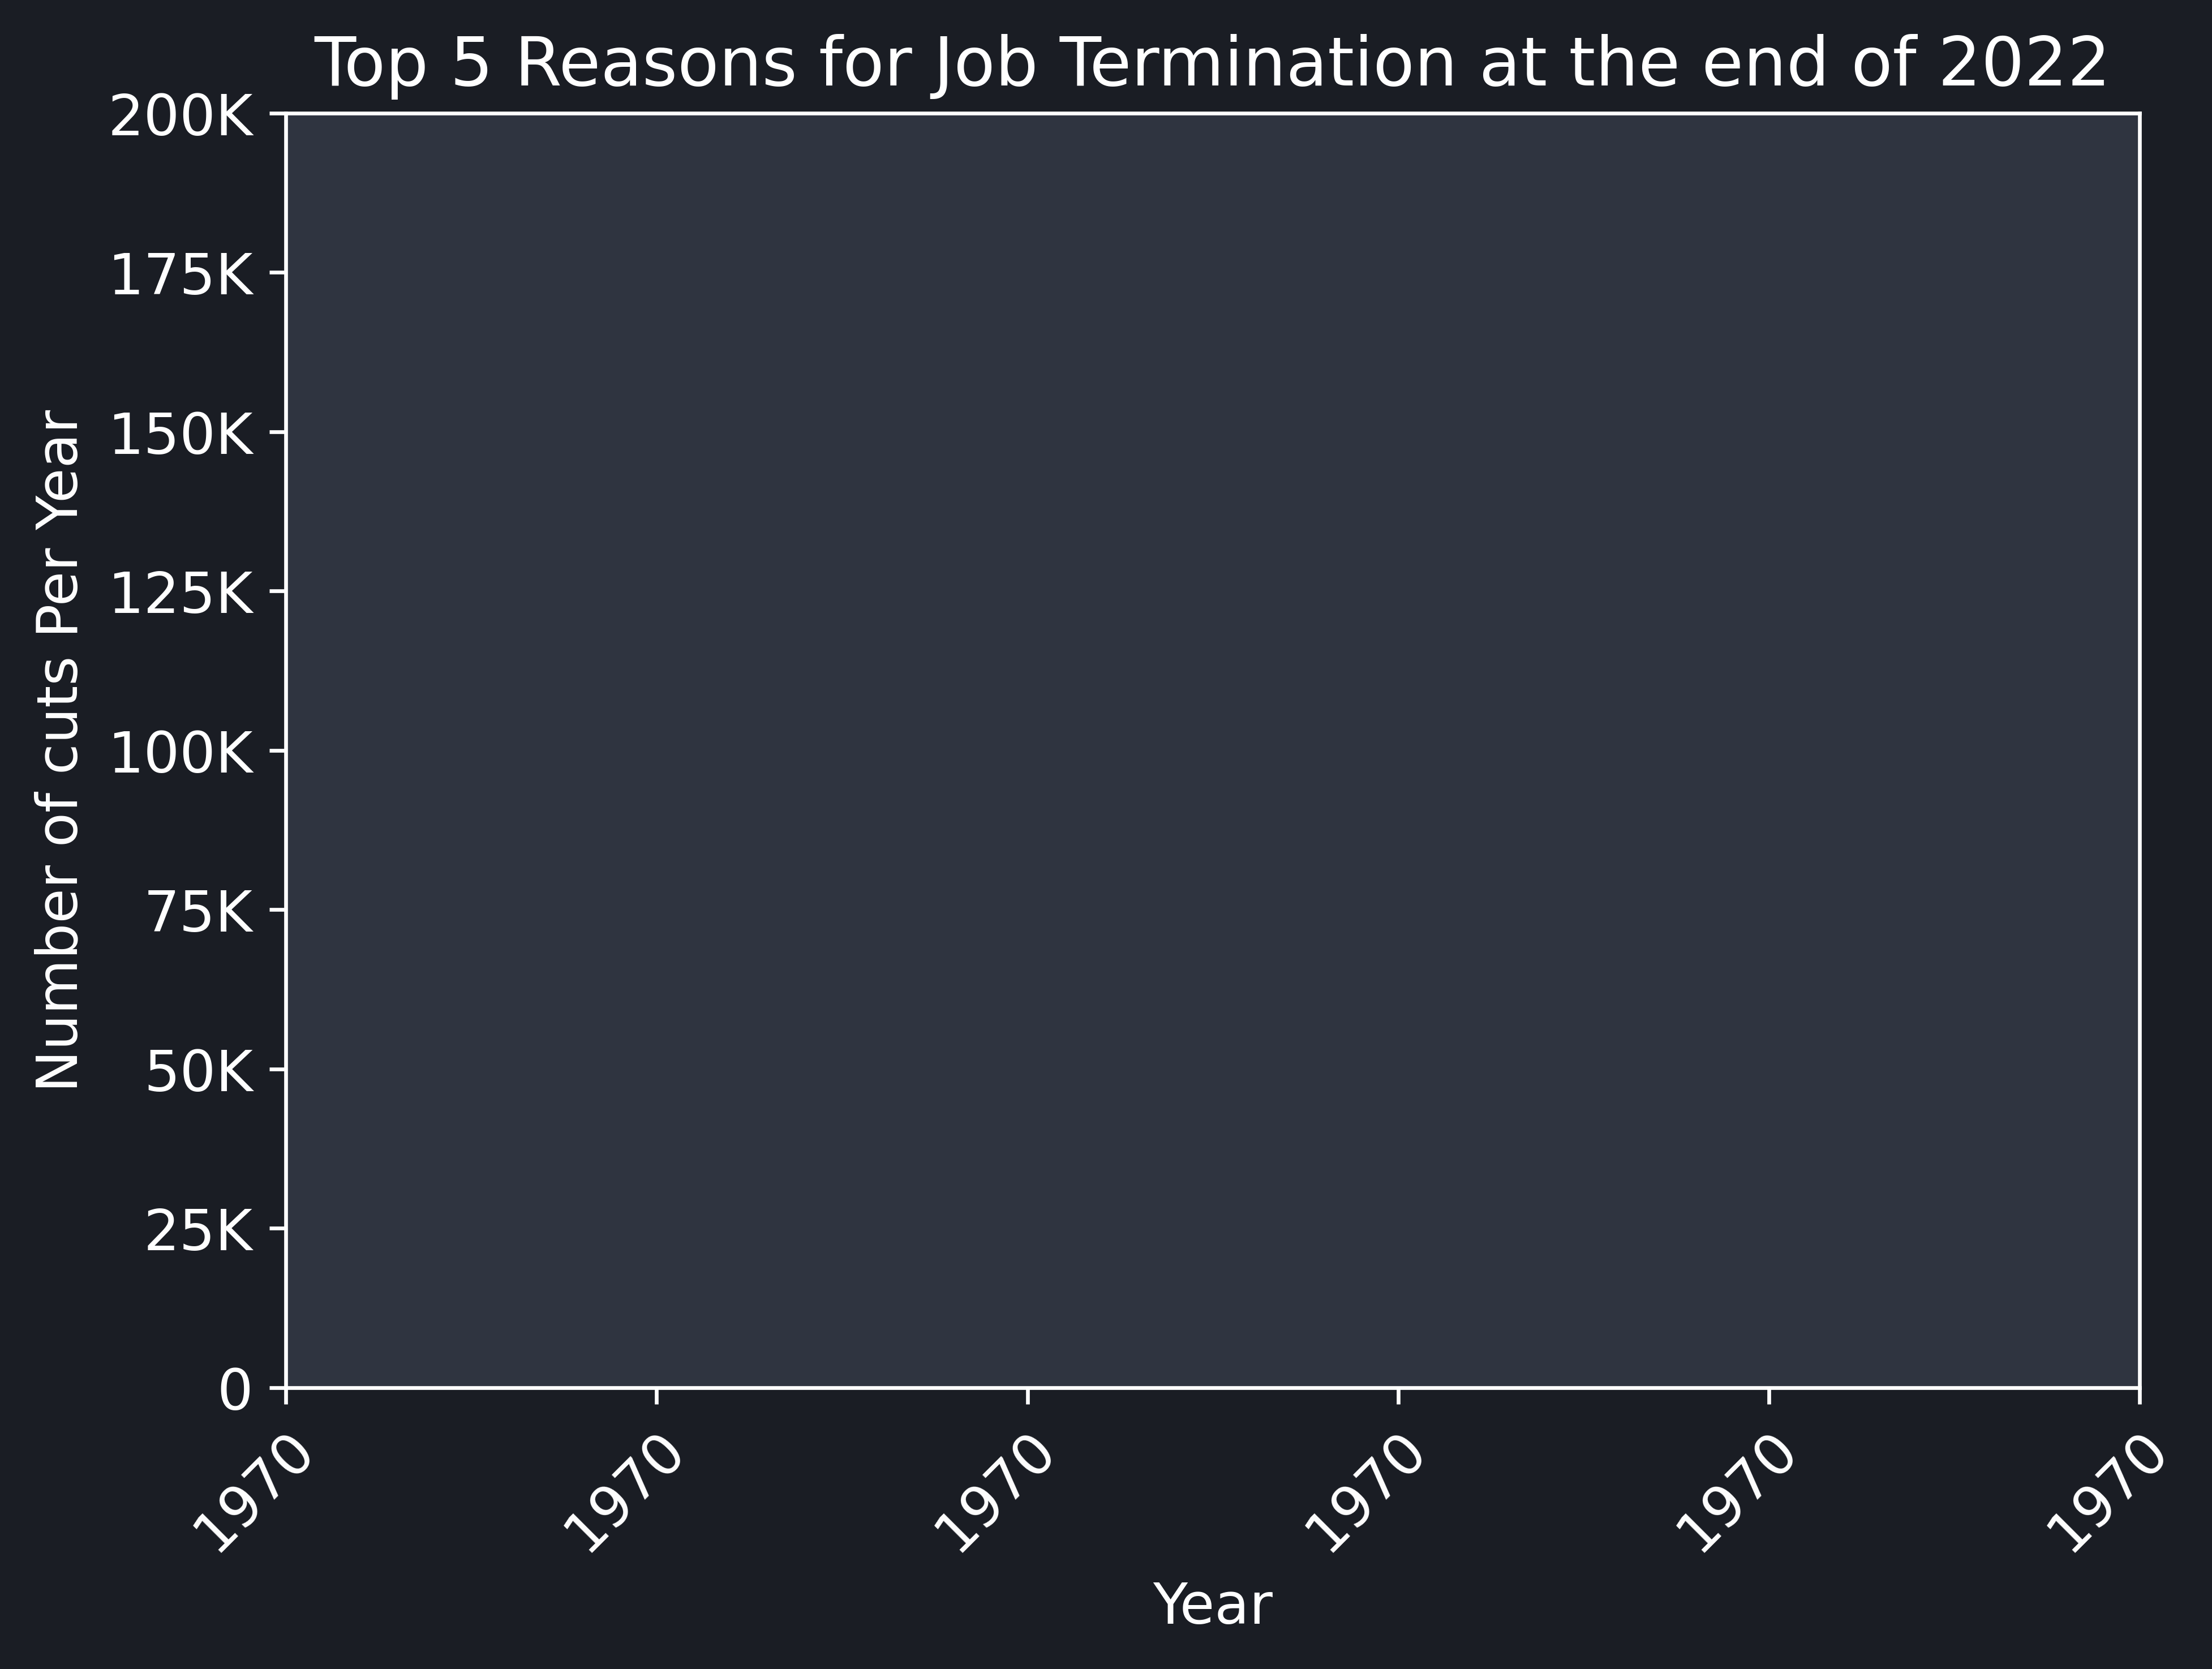

In [17]:
# Takes a minute to save
save_gif=False

# Number formatter from https://learndataanalysis.org/source-code-format-axis-label-to-thousands-and-millions-suffix-matplotlib-tutorial/
def format_number(data_value, indx):
    if data_value >= 1e6:
        formatter = '{:1.1f}M'.format(data_value*1e-6)
    elif data_value >= 1e3:
        formatter = '{:1.0f}K'.format(data_value*1e-3)
    else:
        formatter = '{:1.0f}'.format(data_value)
    return formatter

challenger_data = ProcessData('data/challenger_data')
challenger_data = challenger_data.process()
# print(reason_data['reason'].sort_values(by=[max(reason_data['reason'])],ascending=False))
to_plot_reason=(challenger_data['reason']
         .sort_values(by=[max(challenger_data['reason'])],ascending=False)
         .iloc[0:5].transpose()
        #  .reset_index().set_index('index')
         .sort_index(ascending=False)
         )
# print(to_plot_reason)

p_legend=[to_plot_reason.columns[i].replace('_',' ') + ': ' + str(to_plot_reason.iloc[0,i]) for i in range(len(to_plot_reason.columns))]
# print(p_legend)

# Year converts to YYYY/Jan/1, however the data is for the end of year.
to_plot_reason.index=pd.to_datetime(to_plot_reason.index,format='%Y')

# interpolate for smooth curve in plot
to_plot_reason=to_plot_reason.reindex(pd.date_range(min(to_plot_reason.index),pd.to_datetime('jan 2, 2022'),freq="D"))
# so that endpoints of the plot are the values for 2022
to_plot_reason.iloc[-1]=to_plot_reason.iloc[-2] 
# Spline method drastically overshoots the data points
to_plot_reason=to_plot_reason.interpolate(method='polynomial',order=2)
to_plot_reason=to_plot_reason.reindex(pd.date_range(min(to_plot_reason.index),max(to_plot_reason.index),freq="37D"))

# Plot parameters
fig, ax = plt.subplots(constrained_layout=True)
plt.xticks(rotation=45, ha="right", rotation_mode="anchor") #rotate the x-axis values
ax.yaxis.set_major_formatter(format_number)
ax.xaxis.set_major_formatter(dates.DateFormatter('%Y'))
plt.ylabel('Number of cuts Per Year')
plt.xlabel('Year')
plt.title('Top 5 Reasons for Job Termination at the end of 2022')

# Plot builder for animation
def build_line_chart(i=int):
    color = ['#e84118', 'orange', 'purple', 'green', 'gray',]
    plt.legend(p_legend, loc='upper left')
    p = plt.plot(to_plot_reason[:i].index, to_plot_reason[:i].values) #note it only returns the dataset, up to the point i
    for i in range(5):
        p[i].set_color(color[i]) #set the colour of each curve

# animator.save takes a bit of time
animator = ani.FuncAnimation(fig, build_line_chart, interval = 10)
plt.ylim([0, 200000])
if save_gif:
    # PillowWriter doesn't control loop count yet. Have to modify externally
    # because  looping makes this plot useless.
    animator.save('plots/reasons.gif', dpi=300, writer=ani.PillowWriter(fps=20))
else:
    # doesn't show animation in jupyter
    plt.show()
plt.close()

In [ ]:
hiring_data=challenger_data['hiring'][2022].sort_values(ascending=False).drop('TOTAL')[0:10]
hiring_data=pd.merge(hiring_data,challenger_data['hiring'][2021],right_index=True,left_index=True)
hiring_data=hiring_data.astype(int)
industries=hiring_data.index.values
h2021=hiring_data[2021].values
h2022=hiring_data[2022].values

In [ ]:
# New job openings
x_axis=np.arange(len(industries))
fig, ax = plt.subplots(figsize=(7,5),constrained_layout=True)
industries=[i.replace('_',' ') for i in industries]
plt.bar(x_axis + 0.1,h2022,0.2,label='2022')
plt.bar(x_axis - 0.1,h2021,0.2,label='2021')
ax.yaxis.set_major_formatter(format_number)
plt.xlabel('Industry')
plt.ylabel('Number of New Job Openings')
plt.title('Announced Job Openings in 2022 vs 2021')
plt.xticks(x_axis, industries, rotation=45, ha="right", rotation_mode="anchor")
plt.ylim([0, 500_000])
plt.legend()
plt.show()
# Retail is 728k and 882k for 2022,2021

In [ ]:
# Total Compensation vs Layoffs Comparison
total_comp_layoffs = data['salary_processed']['__company_comp_salaries']
fig,ax = plt.subplots(figsize=(10, 5))
total_comp_layoffs.plot.bar(x='company', y='totalyearlycompensation',ax=ax)
total_comp_layoffs.plot(x='company',y = 'percentage_laid_off',secondary_y =True,ax=ax,color='blue')
for container in ax.containers:
    ax.bar_label(container)
ax.set_ylabel('Total Compensation')
ax.yaxis.set_major_formatter(format_number)
ax.right_ax.set_ylabel('Total Employees Laid Off')
plt.ylabel('Percentage of Employees Laid Off')
plt.xlabel('Company')
plt.title('Comparison of Average Total Compensation and Layoffs for Top Tech Companies')
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax.right_ax.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc='lower left')
plt.show()